# 1.2a: L2 Norm Histogram

This notebook computes the L2 norm (Euclidean distance from origin) for every token vector in W and visualizes the distribution.

## Why Norms?

The L2 norm tells us how "far" each token is from the origin in gamma space. For a vector **v** in d dimensions:

$$\|\mathbf{v}\|_2 = \sqrt{\sum_{i=1}^d v_i^2}$$

Most tokens cluster around a characteristic scale (the "typical" magnitude for this model), but outliers and structure in this distribution can reveal interesting patterns.

## Discovery: The Spike

In some models, we observe an unusual **overdensity** at lower norms—a spike of tokens that are significantly closer to the origin than the main population. This is the first hint that something interesting is happening.

Let's see if this model has one.

## Parameters

In [56]:
# Model to analyze
# MODEL_NAME = "Qwen3-4B-Instruct-2507"
# MODEL_NAME = "Qwen2.5-3B-Instruct"
# MODEL_NAME = "Qwen1.5-4B-Chat"
# MODEL_NAME = "Llama-3.2-3B-Instruct"
# MODEL_NAME = "gemma-3-4b-it"
# MODEL_NAME = "granite-4.0-micro"
MODEL_NAME = "Phi-3-mini-4k-instruct"

# Histogram parameters
NUM_BINS = 100
FIGSIZE = (12, 6)
DPI = 75

## Imports

In [57]:
import torch
import matplotlib.pyplot as plt
from safetensors.torch import load_file
from pathlib import Path

## Load W

In [58]:
# Load W in bfloat16
tensor_path = Path(f"../tensors/{MODEL_NAME}/W.safetensors")
W_bf16 = load_file(tensor_path)["W"]

print(f"Loaded W from {tensor_path}")
print(f"  Shape: {W_bf16.shape}")
print(f"  Dtype: {W_bf16.dtype}")

# Convert to float32 for numerical precision
W = W_bf16.to(torch.float32)
print(f"  Converted to {W.dtype} for analysis")

Loaded W from ../tensors/Phi-3-mini-4k-instruct/W.safetensors
  Shape: torch.Size([32064, 3072])
  Dtype: torch.bfloat16
  Converted to torch.float32 for analysis


## Compute L2 Norms

In [59]:
# Compute L2 norm for each token (each row of W)
norms = torch.linalg.vector_norm(W, ord=2, dim=1)

print(f"L2 Norms:")
print(f"  Count: {len(norms):,}")
print(f"  Mean: {norms.mean():.6f}")
print(f"  Std: {norms.std():.6f}")
print(f"  Min: {norms.min():.6f}")
print(f"  Max: {norms.max():.6f}")

L2 Norms:
  Count: 32,064
  Mean: 2.592993
  Std: 0.344173
  Min: 0.860660
  Max: 3.923995


## Plot Histogram

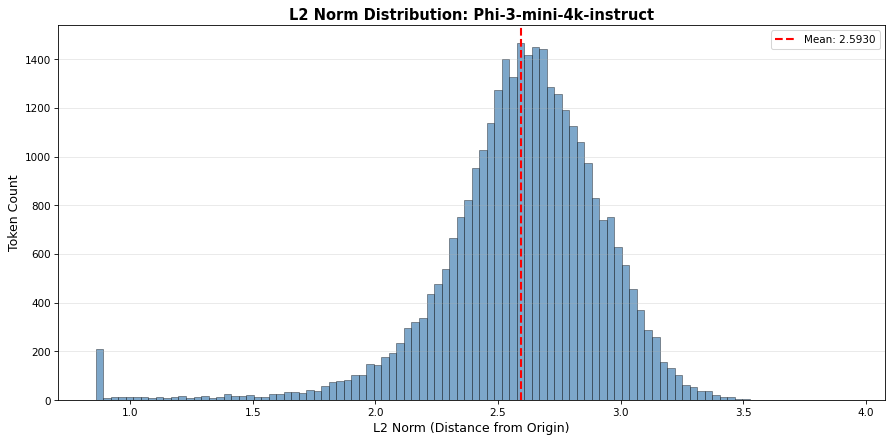

In [60]:
fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)

# Plot histogram
ax.hist(norms.numpy(), bins=NUM_BINS, color='steelblue', alpha=0.7, edgecolor='black', linewidth=0.5)

# Add vertical line at mean
ax.axvline(norms.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {norms.mean():.4f}')

# Labels and formatting
ax.set_xlabel('L2 Norm (Distance from Origin)', fontsize=12)
ax.set_ylabel('Token Count', fontsize=12)
ax.set_title(f'L2 Norm Distribution: {MODEL_NAME}', fontsize=14, fontweight='bold')
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

## Observations

Look for:
- **Main peak**: Where most tokens cluster (the "typical" scale)
- **Left tail**: Tokens unusually close to origin (potential dead tokens)
- **Right tail**: Tokens unusually far from origin (high-magnitude outliers)
- **Overdensities**: Any distinct secondary peaks or spikes

If there's a spike at low norms (well-separated from the main population), that's our first clue that something interesting is happening in this model's token space.